# Банки - анализ оттока клиентов
### Задача
1) Проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.

2) Провести исследовательский анализ данных

3) Выделить портреты клиентов, которые склонны уходить из банка

4) Сформулировать и проверить статистические гипотезы

5) Гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались

6) Статистическую гипотезу относительно представленных данных

### Описание данных
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

#### Колонки:

userid — идентификатор пользователя,

score — баллы кредитного скоринга,

City — город,

Gender — пол,

Age — возраст,

Objects — количество объектов в собственности,

Balance — баланс на счёте,

Products — количество продуктов, которыми пользуется 
клиент,

CreditCard — есть ли кредитная карта,

Loyalty — активный клиент,

estimated_salary — заработная плата клиента,

Churn — ушёл или нет.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import plotly.express as ex
import matplotlib.pyplot as plt
import plotly

#import folium #pip install folium выполнить команду в терминале
#from folium import Choropleth, Circle, Marker
#from folium.plugins import HeatMap, MarkerCluster
#from matplotlib.pyplot import figure, show
#import calmap #pip install calmap выполнить команду в терминале

import time
from geopy.geocoders import Nominatim # pip install geopy

In [2]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('/datasets/bank_dataset.csv')

## Получим информацию о данных

In [4]:
df.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Пропуски и дубликаты

In [6]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing(df).round(1)

,Total,Percent
Balance,3617,36.2
userid,0,0.0
score,0,0.0
City,0,0.0
Gender,0,0.0
Age,0,0.0
Objects,0,0.0
Products,0,0.0
CreditCard,0,0.0
Loyalty,0,0.0


Процент пропусков в столбце баланс не певышает 40%, с одной стороны такое количество не большое и их можно удалить, но с другой стороны пропуски могут означать 0 баланс. Оставим их на данном этапе

In [7]:
df.duplicated().sum()

0

### Анализ числовых столбцов

In [8]:
df[['score', 'Age', 'Objects', 'Products', 'Balance', 'estimated_salary' ]].describe().T

,count,mean,std,min,25%,50%,75%,max
score,10000.0,650.528800,96.653299,350.00,584.000,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.000,37.000,44.0000,92.00
Objects,10000.0,5.012800,2.892174,0.00,3.000,5.000,7.0000,10.00
Products,10000.0,1.530200,0.581654,1.00,1.000,1.000,2.0000,4.00
Balance,6383.0,119827.493793,30095.056462,3768.69,100181.975,119839.690,139512.2900,250898.09
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.110,100193.915,149388.2475,199992.48


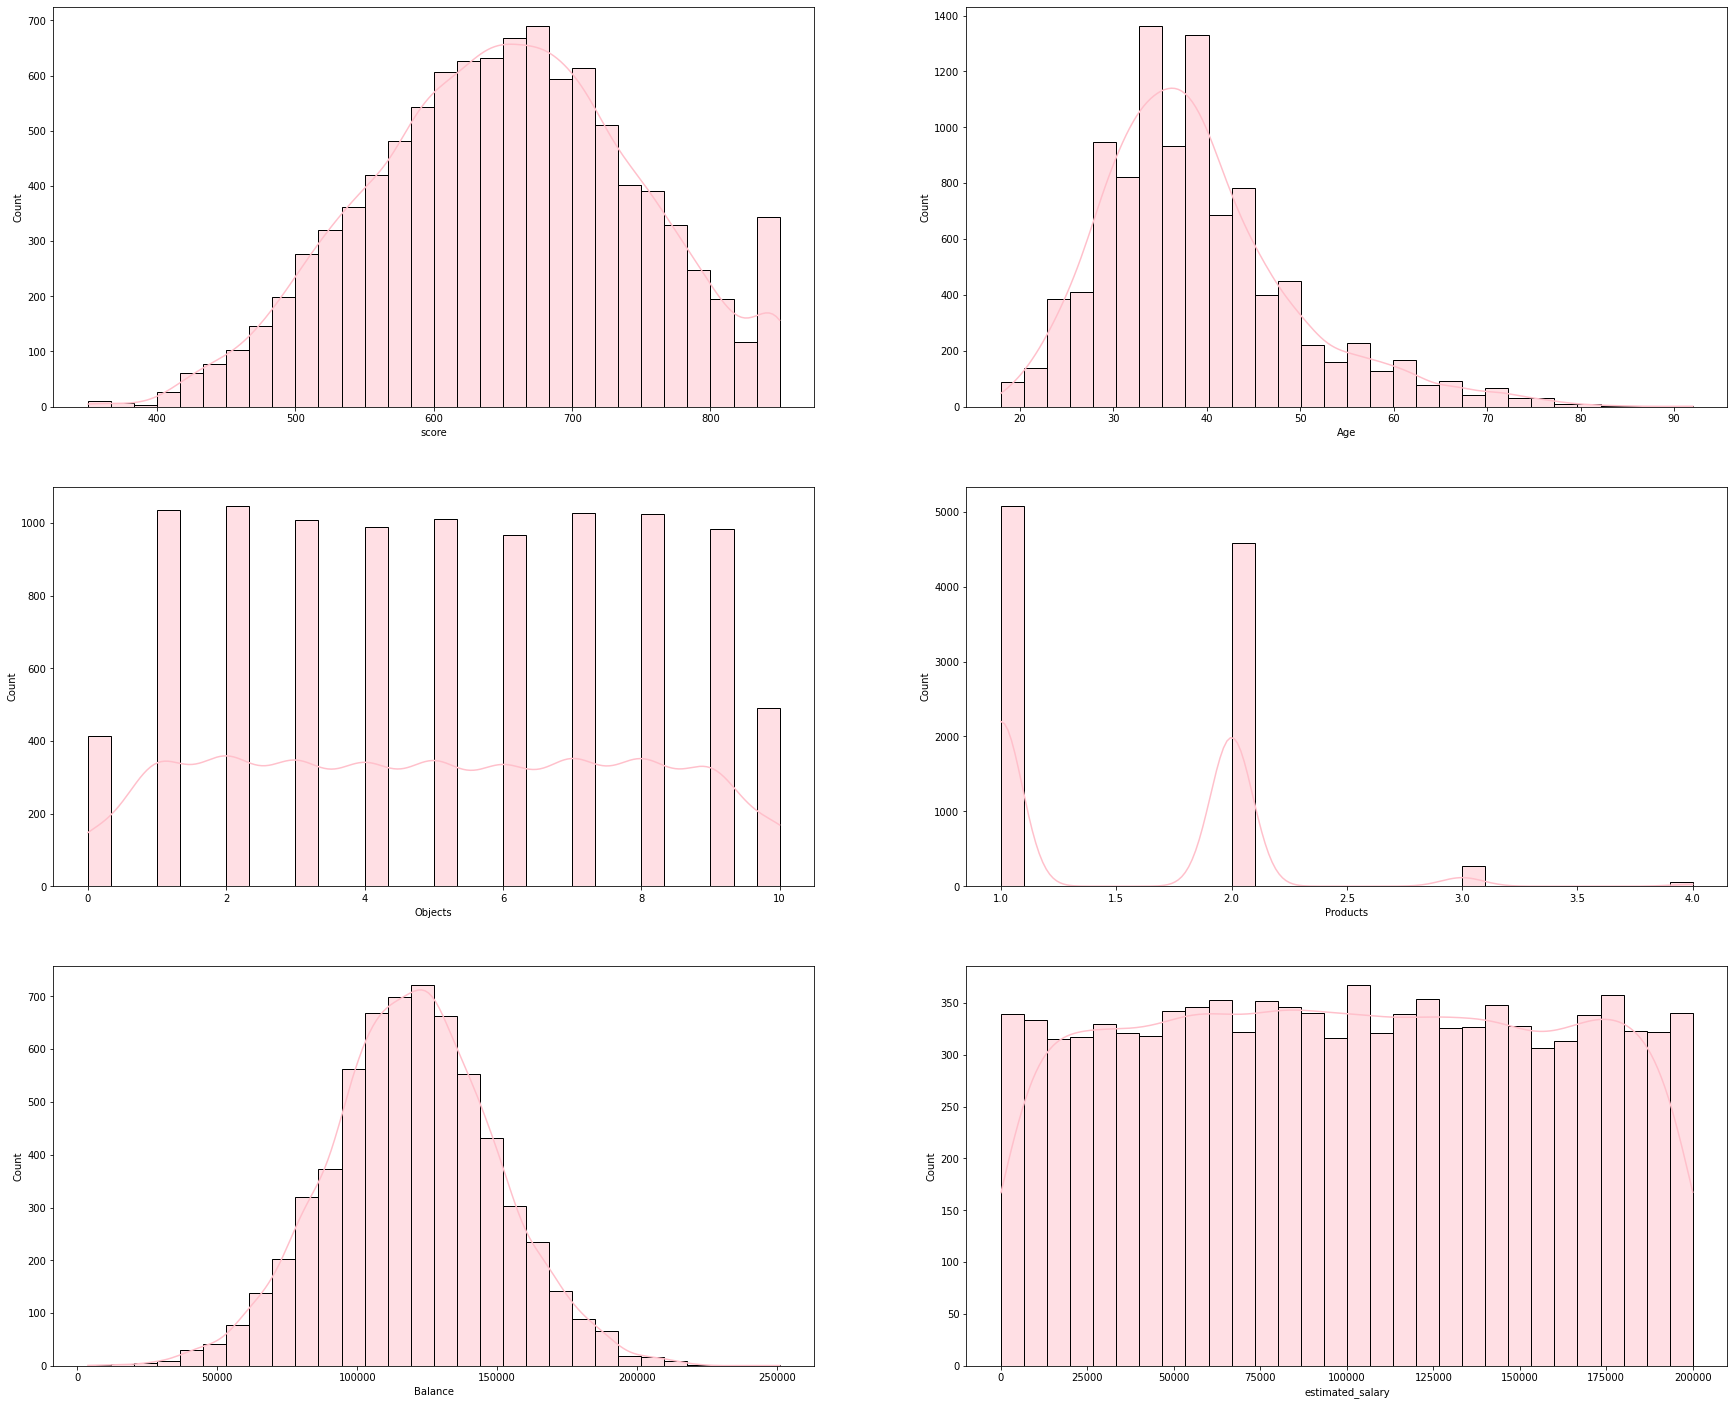

In [9]:
def hist(df, x, ax, bins=30):
    sns.histplot(data=df, x=x, bins=bins, ax=ax,kde=True, color="pink")    

columns = ['score', 'Age', 'Objects', 'Products', 'Balance', 'estimated_salary' ]

fig, axs = plt.subplots(3, 2, figsize=(30, 25))

for i, col in enumerate(columns):
    
    row_index = i // 2
    col_index = i % 2
    
    hist(df, col, axs[row_index][col_index])

plt.show()

Визуализация данных помогает нам сделать вывод: 

    1) Score: самое большое количество баллов находится в диапазоне 600 - 700

    2) Age: основной возраст клиентов 37 - 31 

    3) Objects: интересное распредление данных, количество вхождений по каждому объекту примерно равно, минимум вхождений у 0 и 10 объектов

    4) Products: в основном клиенты  преобретают не более двух дополнительных услуг банка

    5) Balance: самый частый баланс от 100000 до 150000

    6) Salary: количество вхождений по зарплате приблизительно одинаковый у всех

### Изменение типов данных

Видим, что стобцы churn, loyalty, credit card, gender - имеют категориальный характер

In [10]:
cat = ['Churn', 'Loyalty', 'CreditCard', 'Gender']
for i in cat :
    df[i] = df[i].astype('category')

In [11]:
df[['Churn', 'Loyalty', 'CreditCard', 'Gender']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Churn       10000 non-null  category
 1   Loyalty     10000 non-null  category
 2   CreditCard  10000 non-null  category
 3   Gender      10000 non-null  category
dtypes: category(4)
memory usage: 39.7 KB


### Приведем названия столбцов к нижему регистру для удобства.

In [12]:
df.columns = df.columns.str.lower()
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

### Добавление новых столбцов
Тк в данных присутствует город, добавим информацию по широте и долготе города

In [13]:
app = Nominatim(user_agent="russia")

In [14]:
def lat(x): 
    time.sleep(1)
    try:
        return app.geocode(x).raw["lat"]
    except:
        return lat(x)   
    
def lon(x):    
    time.sleep(1)
    try:
        return app.geocode(x).raw["lon"]
    except:
        return lon(x)

In [15]:
geo = df['city'].value_counts()

In [16]:
geo = geo.to_frame().reset_index().rename(columns={"city":"count","index":"city"})

In [17]:
geo['lat'] = geo['city'].apply(lat)

In [18]:
geo['lon'] = geo['city'].apply(lon)

In [19]:
geo

,city,count,lat,lon
0,Ярославль,5014,57.6263877,39.8933705
1,Ростов Великий,2509,57.1974627,39.4073138
2,Рыбинск,2477,58.050373,38.834637


In [20]:
df = pd.merge(df, geo, on="city")

In [21]:
df.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,count,lat,lon
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,5014,57.6263877,39.8933705
1,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,5014,57.6263877,39.8933705
2,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,5014,57.6263877,39.8933705
3,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,5014,57.6263877,39.8933705
4,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0,5014,57.6263877,39.8933705


### Обработка пропусков

In [22]:
nan = df[df['balance'].isnull()]

In [23]:
nan

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,count,lat,lon
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,5014,57.6263877,39.8933705
2,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,5014,57.6263877,39.8933705
3,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,5014,57.6263877,39.8933705
7,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0,5014,57.6263877,39.8933705
8,15734219,549,Ярославль,Ж,25,5,NaN,2,0,0,190857.79,0,5014,57.6263877,39.8933705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,15654074,714,Рыбинск,М,29,4,NaN,2,1,1,37605.90,0,2477,58.050373,38.834637
7484,15609279,573,Рыбинск,М,44,9,NaN,2,1,0,107124.17,0,2477,58.050373,38.834637
7485,15637348,702,Рыбинск,М,44,9,NaN,1,0,0,59207.41,1,2477,58.050373,38.834637
7489,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0,2477,58.050373,38.834637


In [24]:
nan = df[df['balance'].isnull()]

Предположим, что речь идет об остатке на счете в конце периода. Посмотрим как связан отток клиентов и заработная плата

In [25]:
nan.churn.value_counts()

0    3117
1     500
Name: churn, dtype: int64

Заметим, что пропуски в большинстве присуще оставшимся клиентам. Посмотри, как связны пропуски и кредитные карты

In [26]:
nan.creditcard.value_counts()

1    2592
0    1025
Name: creditcard, dtype: int64

Пропуски в балансе присуще клиентам с кредитными картами

In [27]:
nan.products.value_counts()

2    2600
1     905
3      98
4      14
Name: products, dtype: int64

Пропуски в балансе присуще клиентам с двумя продуктами, напрмер это может быть ипотека и кредитная карта

In [28]:
pivot_table= nan.pivot_table(index=['products'],
                                columns = 'creditcard',
                                values = 'userid',
                                aggfunc='count')
pivot_table

creditcard,0,1
products,,
1,248,657
2,742,1858
3,30,68
4,5,9


Действительно, у людей с кредитными картами и двумя продуктами больше всего пропусков.

Скорее всего всего все пропущенные значения означают нулевой баланс. 

Другой вариант, что речь идет о клиентах, использующих только кредитные продукты и не держащих собственных средств на дебетовом счете. В таком случае у клиента как раз могут быть два продукта: например, ипотека и кредитка.

Обработать данные пропуски без дополнительной информации невозможно

### Вывод
1) Визуализация данных помогает нам сделать вывод: 

    1.1 Score: самое большое количество баллов находится в диапазоне 600 - 700

    1.2 Age: основной возраст клиентов 37 - 31 

    1.3 Objects: количество вхождений по каждому объекту примерно равно, минимум вхождений у 0 и 10 объектов

    1.4 Products: в основном клиенты  преобретают не более двух дополнительных услуг банка

    1.5 Balance: самый частый баланс от 100000 до 150000

    1.6 Salary: количество вхождений по зарплате приблизительно одинаковый у всех
    
2) Перевели названия в нижний регистр 

3) Изменили тип данных у 'Churn', 'Loyalty', 'CreditCard', 'Gender' на категориальный 

4) Выдвинули предположение по пропускам в столбце баланса: 
    
    4.1 Нулевой баланс 
    
    4.2 Клиенты использующие кредитные карты

5) Дубликатов не обнаружино

Данные чистые, приступим к EDA

## EDA

### Корреляция данных

In [29]:
df = df.drop(columns = ['userid', 'count'], axis=1)

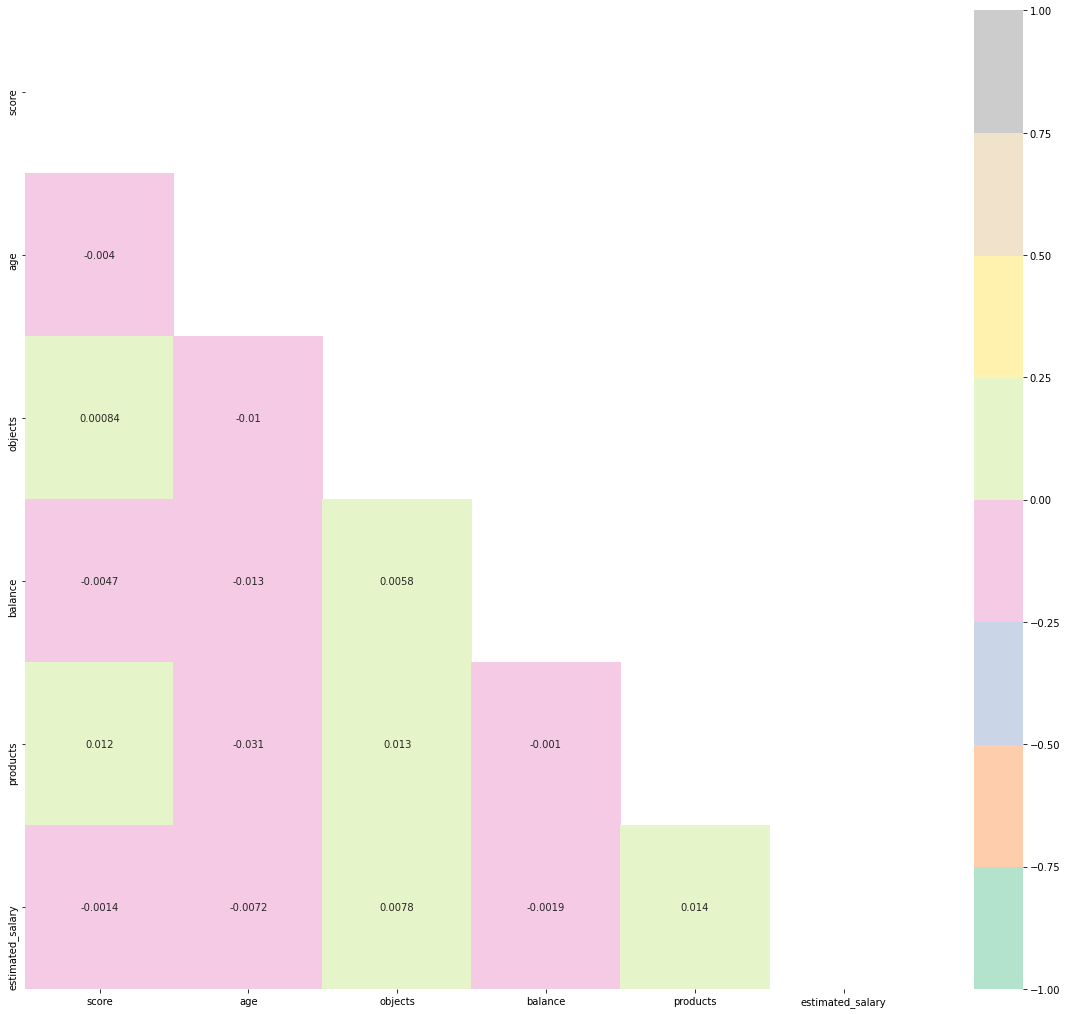

In [30]:
plt.figure(figsize = (20,18))

data = df[['score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn']]

m =np.triu(np.ones_like(data.corr(), dtype=bool))

sns.heatmap(data.corr(), data = data, mask = m,  annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'Pastel2');

Данные между собой не коррелируют.

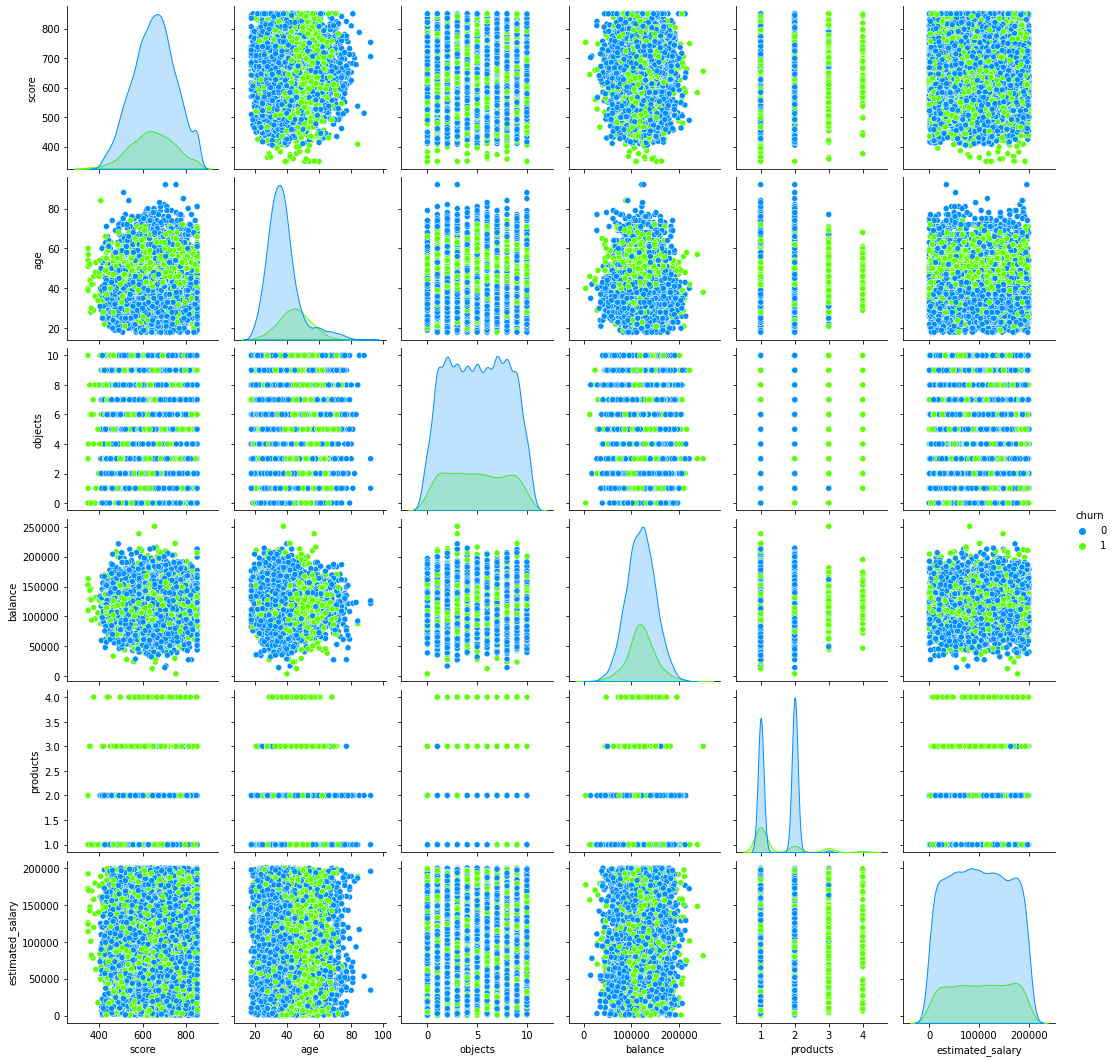

In [31]:
sns.pairplot(df,hue= 'churn', palette="gist_rainbow_r");

### Средние и стандартные отклонения признаков

In [32]:
data = df.copy()
data.churn = data.churn.astype(int)

In [33]:
data.churn 

0       1
1       1
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    1
Name: churn, Length: 10000, dtype: int64

In [34]:
mean_std = data.agg(['mean', 'std']).T.round(1)
mean_std

,mean,std
score,650.5,96.7
age,38.9,10.5
objects,5.0,2.9
balance,119827.5,30095.1
products,1.5,0.6
estimated_salary,100090.2,57510.5
churn,0.2,0.4


Средняя по:
* оттоку клиентов равна 20%
* возрасту клиентов 40

### Распределения признаков

#### Количественные признаки

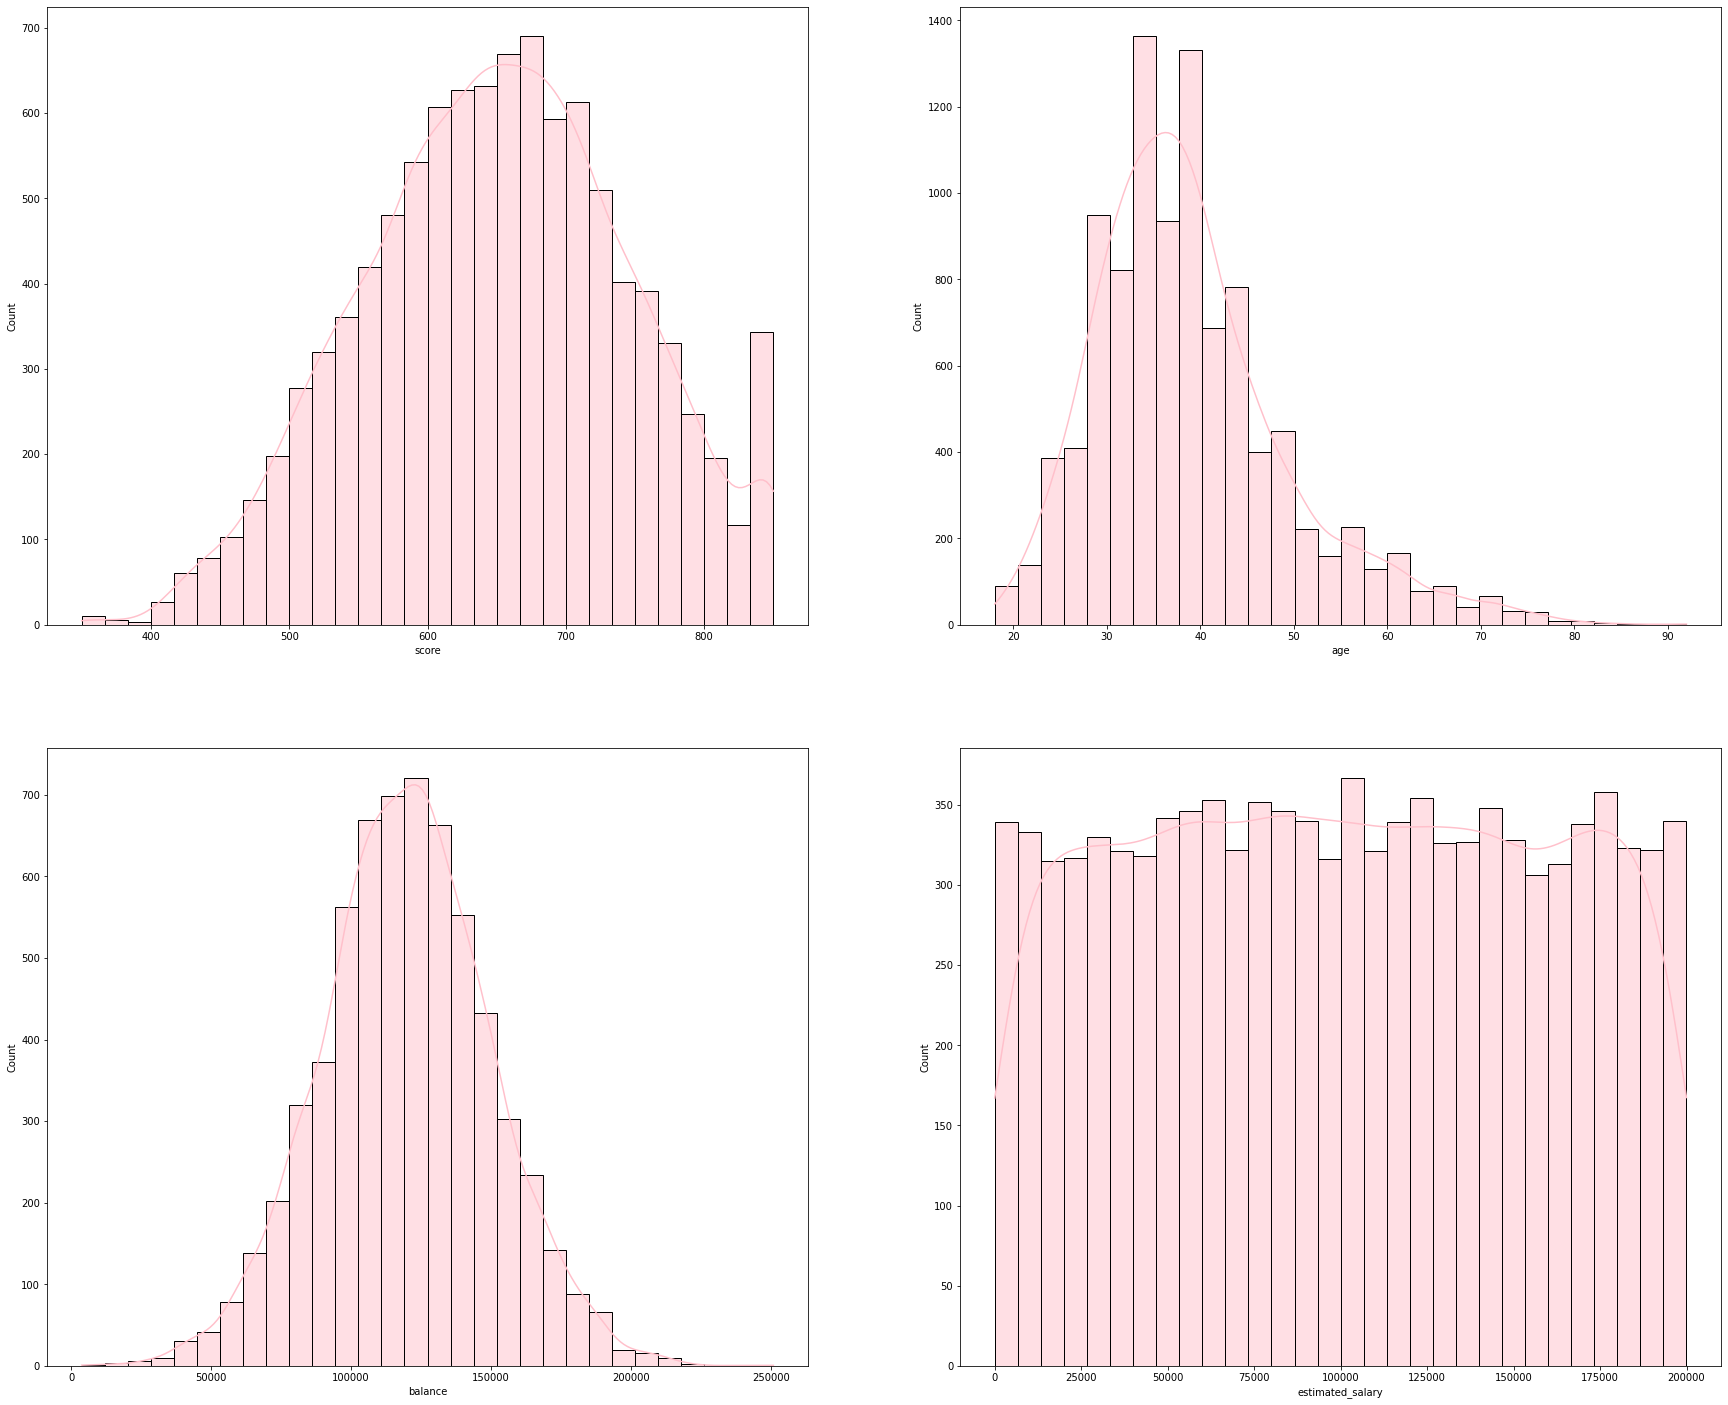

In [35]:

columns = ['score', 'age', 'balance', 'estimated_salary' ]

fig, axs = plt.subplots(2, 2, figsize=(30, 25))

for i, col in enumerate(columns):
    
    row_index = i // 2
    col_index = i % 2
    
    hist(df, col, axs[row_index][col_index])

plt.show()

Количественные признаки распределены нормально. Из аномалий видим, что есть резкий всплеск в score на 850 величине - это может быть связано с тем, что более выские баллы не выгодны для банка. Также удивляет переменная с зарплатой - данные распределены равно, нет скошенных кривых - это может быть связано с опредленной выборкой модели клиента

#### Категоральные  признаки

In [36]:
def catplot(df, x):
    sns.catplot(data=df, x=x, kind='count', palette="Pastel2")    

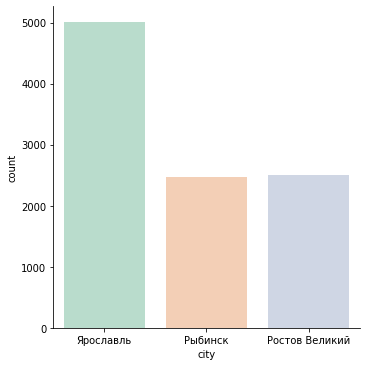

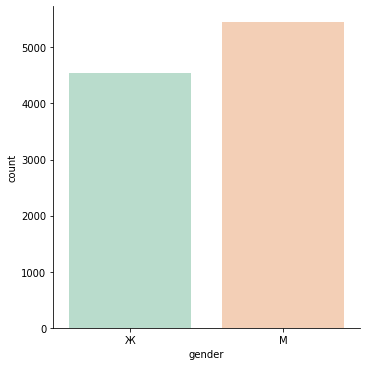

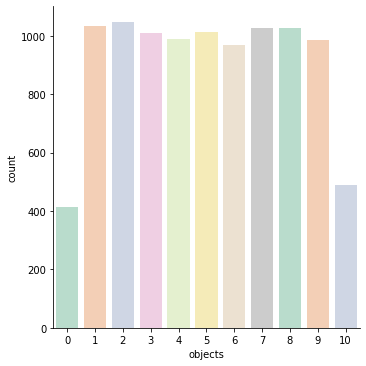

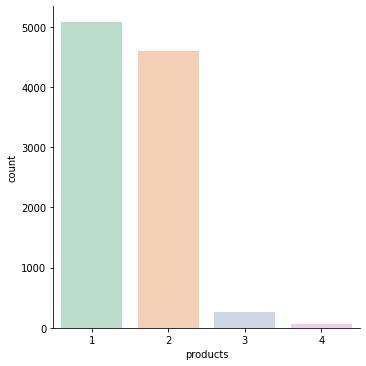

In [37]:
columns = ['city', 'gender', 'objects', 'products']

for col in columns:
    catplot(df, col)
    
plt.show()

1) Большинство людей из областного центра Ярославля. Рыбинск и Ростов примерно поровну.

2) Соотношение полов приблизительно одинаковое, но все же количество больше в пользу мужчин.

3) Странное распределение по количеству объектов: однородность у 1-9 объектов, но резкие скочки у 0 и 10 - причем они равные приблизительно, возможно это опять связно с моделью выборки 

4) Большинство клиентов пользуются одним или двумя продуктами 


#### Дискретные переменные

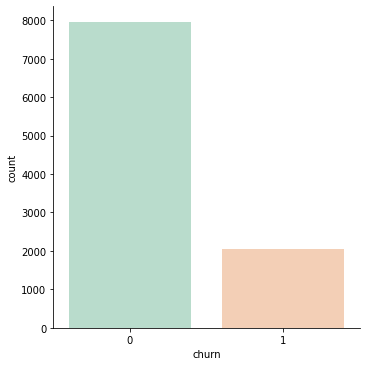

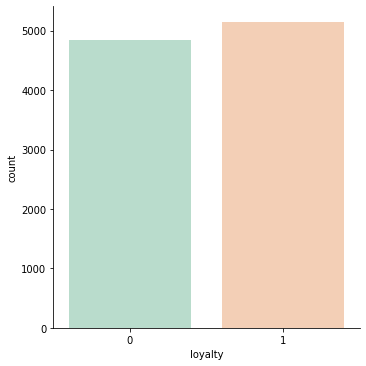

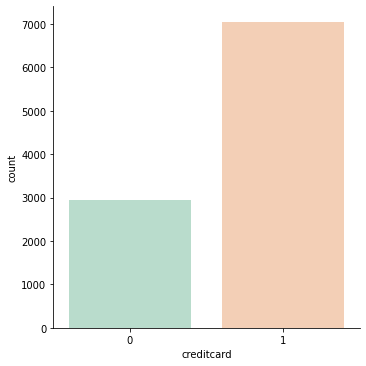

In [44]:
columns = ['churn', 'loyalty', 'creditcard']

for col in columns:
    catplot(df, col)
    
plt.show()

1) Оттока в 4 раза меньше - 20%

2) Активных клиентов примерно столько же сколько не активных 

3) Кредитными картами пользуются подавляющее большинство

### Вывод  

1) Можно отметить странную однородность распределения оценочного дохода и количества объектов в собственности. 

2) Также можно отметить скачок на максимальном кредитном скоринге

## Портреты клиентов склонных к оттоку